# HMM-Based Futures Price Forecasts

## Package Required for this Project and Explanation 本项目所需包及解释
- `warnings`: Stop return warning messages https://docs.python.org/3/library/warnings.html
- `Numpy`: scientific computing, 向量操作，数学计算包  https://numpy.org/
- `Pandas`: data analysis, 数据分析包（本项目只用来从读取Excel数据)  https://pandas.pydata.org/
- `matplotlib.pyplot`: visualization 从绘图包`matplotlib`里引入`pyplot`函数，并命名为`plt`，用于绘图  https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.html
- `hmmlearn`: Hidden Markov Model，后面使用了其中的`GaussianHMM`函数对期货数据做HMM，非参数高斯混合估计  https://hmmlearn.readthedocs.io/en/latest/

(hmmlearn非常好用，API文档十分清晰)

In [1]:
import warnings       
import numpy as np    # Package Numpy: 
import pandas as pd   # Package Pandas: 
import matplotlib.pyplot as plt 
from hmmlearn import hmm
%matplotlib inline
# %load_ext watermark
# %watermark -v -m -p numpy,pandas,matplotlib,hmmlearn

## Variable Initialization and Function Definition 变量初始化与函数定义

In [2]:
## warnings包，ignore Warnings from output
warnings.filterwarnings("ignore", category=DeprecationWarning)

# PLOT_SHOW=True
# PLOT_TYPE = False

## test data size, 使用 2015 年 5 月 2 0 日至 2020 年 4 月 02 的数据作为训练样本，共30个，末index被忽略
numTest = 30

## number of iteration and K as adaptive limitation
K = 30
numIter = 10000

## dataset, 可直接添加多个数据集.xls
# STOCK = ['corn_data.xls']
STOCK = ['corn_data.xls', 'rubber_data.xls', 'sugar_data.xls']

## label of data columnns
labels = ['Open','Close','High','Low']

## Initiate likelihood, AIC, BIC vector
likelihood = np.empty([0,1])
AIC = np.empty([0,1])
BIC = np.empty([0,1])

## number of hidden states, 可以用range函数调解区间，4个隐藏状态有点少
numState = [2, 3, 4]
# numState = range(2, 20)


## 单日或多日加权预测的天数
numDay = 1

## MAPE function
def calMAPE(predicted_data, true_data):
    return np.divide(np.sum(np.divide(np.absolute(predicted_data - true_data), true_data), 0), true_data.shape[0])

## Main Codes and Explanation 主程序及解释
For ease of understanding, OOP method is not introduced. 为了方便理解，没有使用OOP方式

the Optimum Number of Hidden States is 4
predicted day: ['2020-04-02']
closest day: ['2020-04-02']
predicted day: ['2020-04-03']
closest day: ['2020-04-02']
predicted day: ['2020-04-07']
closest day: ['2020-04-02']
predicted day: ['2020-04-08']
closest day: ['2020-04-02']
predicted day: ['2020-04-09']
closest day: ['2020-04-02']
predicted day: ['2020-04-10']
closest day: ['2020-04-02']
predicted day: ['2020-04-13']
closest day: ['2020-04-02']
predicted day: ['2020-04-14']
closest day: ['2020-04-02']
predicted day: ['2020-04-15']
closest day: ['2020-04-02']
predicted day: ['2020-04-16']
closest day: ['2020-04-02']
predicted day: ['2020-04-17']
closest day: ['2020-04-02']
predicted day: ['2020-04-20']
closest day: ['2020-04-02']
predicted day: ['2020-04-21']
closest day: ['2020-04-02']
predicted day: ['2020-04-22']
closest day: ['2020-04-01']
predicted day: ['2020-04-23']
closest day: ['2020-03-31']
predicted day: ['2020-04-24']
closest day: ['2020-03-30']
predicted day: ['2020-04-27']
c

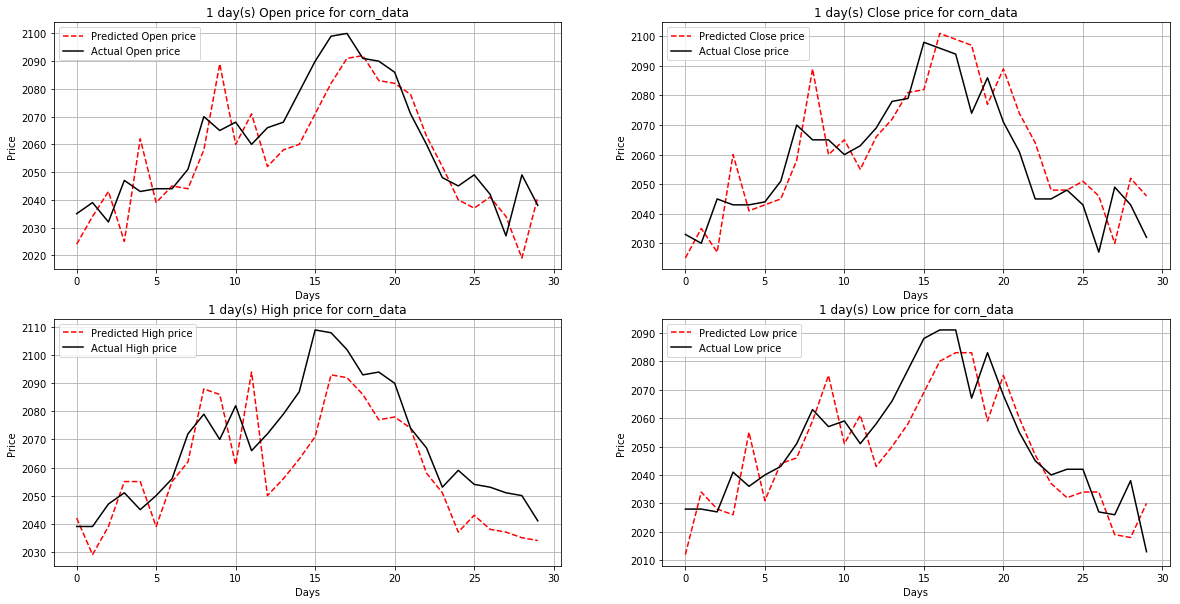

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
the Optimum Number of Hidden States is 4
predicted day: ['2020-04-02']
closest day: ['2020-04-02']
predicted day: ['2020-04-03']
closest day: ['2020-04-02']
predicted day: ['2020-04-07']
closest day: ['2020-04-01']
predicted day: ['2020-04-08']
closest day: ['2020-03-31']
predicted day: ['2020-04-09']
closest day: ['2020-04-02']
predicted day: ['2020-04-10']
closest day: ['2020-04-02']
predicted day: ['2020-04-13']
closest day: ['2020-04-01']
predicted day: ['2020-04-14']
closest day: ['2020-03-31']
predicted day: ['2020-04-15']
closest day: ['2020-03-30']
predicted day: ['2020-04-16']
closest day: ['2020-03-27']
predicted day: ['2020-04-17']
closest day: ['2020-

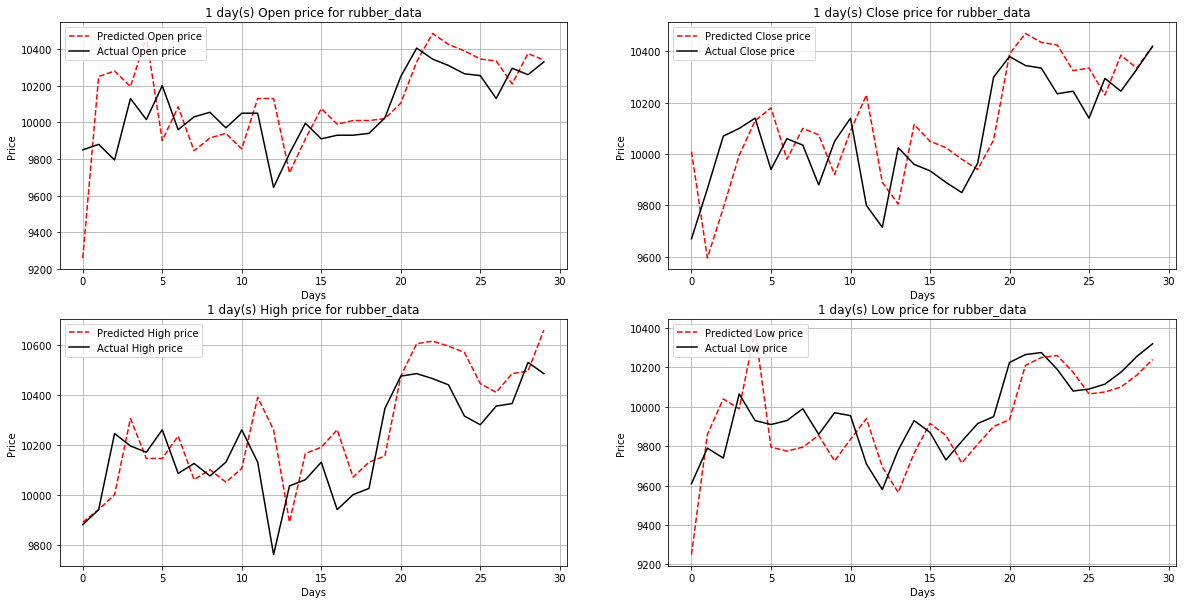

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
the Optimum Number of Hidden States is 4
predicted day: ['2020-04-02']
closest day: ['2020-02-27']
predicted day: ['2020-04-03']
closest day: ['2020-02-26']
predicted day: ['2020-04-07']
closest day: ['2020-02-25']
predicted day: ['2020-04-08']
closest day: ['2020-02-24']
predicted day: ['2020-04-09']
closest day: ['2020-02-21']
predicted day: ['2020-04-10']
closest day: ['2020-02-20']
predicted day: ['2020-04-13']
closest day: ['2020-02-18']
predicted day: ['2020-04-14']
closest day: ['2020-02-18']
predicted day: ['2020-04-15']
closest day: ['2020-02-18']
predicted day: ['2020-04-16']
closest day: ['2020-02-17']
predicted day: ['2020-04-17']
closest day: ['2020-

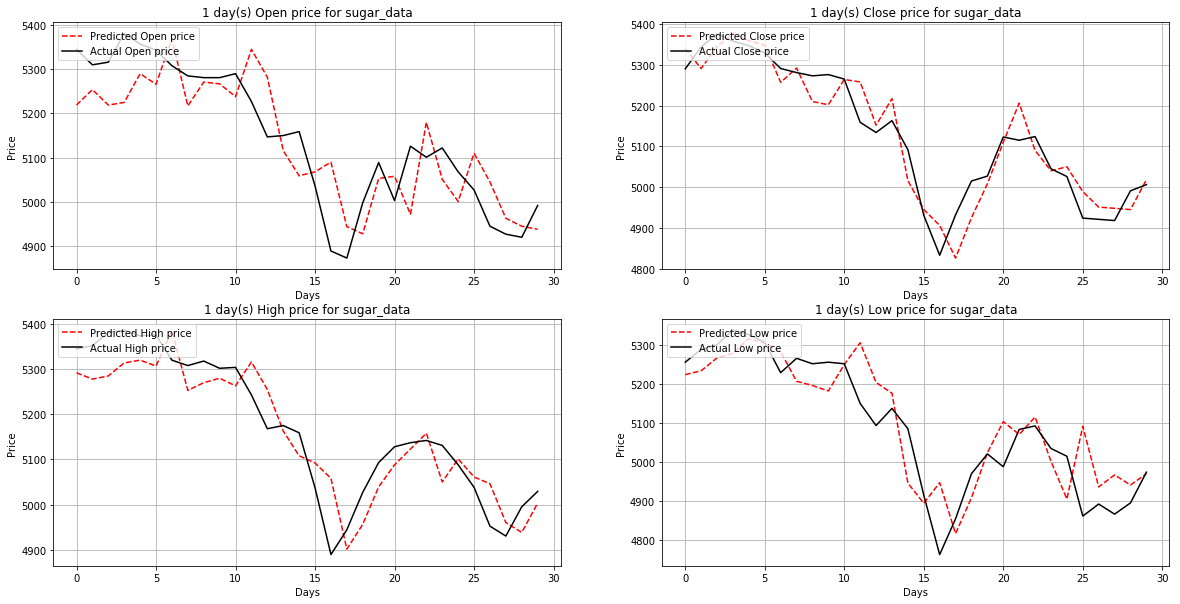

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [5]:
## 主程序
for stock in STOCK:
    ## 读取数据
    dataset = np.array(pd.read_excel(stock))[::-1]
    ## Date data 日期数据
    date = np.array(pd.read_excel('date.xls'))[::-1]
    ## 定义预测矩阵 predicted dataset
    predData = np.empty([0,dataset.shape[1]])
    
    for states in numState:
        num_params = states**2 + states
        model = hmm.GaussianHMM(n_components=states, covariance_type='full', tol=0.0001, n_iter=numIter)
        model.fit(dataset[numTest:,:])
        likelihood = np.vstack((likelihood, model.score(dataset)))
        
        ## AIC & BIC function
        ## np.vstack 用来组合向量
        AIC = np.vstack((AIC, -2 * model.score(dataset) + 2 * num_params))
        BIC = np.vstack((BIC, -2 * model.score(dataset) +  num_params * np.log(dataset.shape[0])))
    
    ## 根据 BIC 选出最优 隐状态数，你也可改为AIC
    optState = np.argmin(BIC) + 2
    print('the Optimum Number of Hidden States is {}'.format(optState))

    ## 每次 loop 选出一组数据进行拟合
    for idx in reversed(range(numTest)):
        trainData = dataset[idx + 1:,:]
        trainingSize = trainData.shape[0]
        
        ## 使用Gaussian HMM function，默认decoder：viterbi，详细API： https://hmmlearn.readthedocs.io/en/latest/api.html
        if idx == numTest - 1:
            model = hmm.GaussianHMM(n_components = optState, covariance_type='full', algorithm = "viterbi", tol=0.0001, n_iter=numIter, init_params='stmc')
        else:
            model = hmm.GaussianHMM(n_components = optState, covariance_type='full', tol=0.0001, n_iter=numIter, init_params='')
            model.transmat_ = transMatrix 
            model.startprob_ = startProb
            model.means_ = means
            model.covars_ = covariance
            
        ## fit model 用于拟合函数
        model.fit(np.flipud(trainData))
        
        ## call following variable return transition matrix, start provbability, means, covariance
        ## 以下函数，更多函数返回值请查询API
        transMatrix = model.transmat_
        startProb = model.startprob_
        means = model.means_
        covariance = model.covars_


        ## Initiate iteration number and log likelihood vector for training data
        ## 初始化 循环数；返回训练数据集log likelihood
        iters = 1;
        pastLikelihood = []
        currLikelihood = model.score(np.flipud(trainData[0:K + 1, :]))
        
        ## A Hidden Markov Chain Modeling of Shanghai Stock Index -- Section 3.2
        ## 论文 基于隐马尔可夫链的上证股指建模 3.2 部分，找到预测所需的模型训练集中的likelihood
        ## while 这里是用来限制内存使用，如果机器没有限制可以修改 while 部分，遍历全部训练集
        while iters < trainingSize / K - 1:
            pastLikelihood = np.append(pastLikelihood, model.score(np.flipud(trainData[iters:iters + K - 1, :])))
            iters = iters + 1
        
        ## section 3.2-(4)
        ## 论文 3.2-(4)部分，找到过去数据中最接近的 d 个相似度。下面代码区分了单日和多日的情况
        likeliDiff = np.absolute(pastLikelihood - currLikelihood)
        if numDay == 1:
            likeliDiffIndex = np.argmin(likeliDiff)
            predChange = trainData[likeliDiffIndex, :] - trainData[likeliDiffIndex + 1, :]
            predData = np.vstack((predData, dataset[idx + 1, :] + predChange))
            
            ## Added log-likelihood day which was closest to the estimated days
            ## 增加了：与目标估计天数LL最接近的日期（训练集）
            print('predicted day: {}'.format(date[idx+1]))
            print("closest day: {}".format(date[numTest + likeliDiffIndex]))
        else:
            sortDiff = 1 / np.sort(likeliDiff)[0:numDay]
            weights = [i / sum(sortDiff) for i in sortDiff]
            likeliDiffIndex = np.argsort(likeliDiff)[0:numDay-1]
            predChange = []
            num = 0
            for i in likeliDiffIndex:
                predChange.append(weights[num] * (trainData[i + 1, :] - trainData[i, :]))
                num += 1
            predChange = [sum(x) for x in zip(*predChange)]
            predData = np.vstack((predData, dataset[idx + 1, :] + predChange))
    
    ## save predicted data 外部保存预测文件
    np.savetxt('{}_predict.csv'.format(stock), predData,delimiter=',',fmt='%.2f')

    ## return MAPE 返回 MAPE 值
    mape = calMAPE(predData, np.flipud(dataset[range(numTest),:]))
    
    ## forecasting plot 
    AIC_Vec = [z for i in AIC for z in i]
    BIC_Vec = [z for i in BIC for z in i]
    print("Transition Matrix:\n {}".format(transMatrix))
    print("Initial state:\n {}".format(startProb))
    print("Means:\n {}".format(means))
    print("Covariance:\n {}".format(covariance))
    print("Log Likelihood: {}".format(currLikelihood))

    print('MAPE of the stock {} is '.format(stock),mape)
    print('AIC:\n {}'.format(AIC_Vec))
    print('BIC:\n {}'.format(BIC_Vec))
    print()
    
    plt.figure(figsize=(20, 10), facecolor='white')
    ## forecasting plot
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        ax.plot(range(numTest), predData[:,i],'r--', label = 'Predicted ' + labels[i] + ' price');
        ax.plot(range(numTest), np.flipud(dataset[range(numTest), i]),'k-', label = 'Actual ' + labels[i] + ' price')
        plt.xlabel('Days')
        plt.ylabel('Price')
        plt.title(str(numDay) + ' day(s) ' + labels[i] + ' price'+ ' for ' + stock[:-4])
        plt.grid(True)
        plt.legend(loc = 'upper left')
    plt.show()
    print("-" * 328)